In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [32]:
img_width, img_height = 224, 224

In [33]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [34]:
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [35]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [36]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("data",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 5631 files belonging to 4 classes.


In [37]:
class_names=dataset.class_names
class_names

['cloudy', 'desert', 'green_area', 'water']

In [38]:
len(dataset)

176

In [39]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 224, 224, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 2, 3, 3, 0, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 3, 0, 1,
       3, 3, 2, 1, 1, 3, 3, 3, 1, 0], dtype=int32)>>


2024-04-26 11:18:57.535842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[23.       51.       73.      ]
  [23.       51.       73.      ]
  [22.785715 50.785713 72.78571 ]
  ...
  [21.571434 49.571434 73.571434]
  [22.       50.       74.      ]
  [22.       50.       74.      ]]

 [[23.       51.       73.      ]
  [23.       51.       73.      ]
  [22.785715 50.785713 72.78571 ]
  ...
  [21.571434 49.571434 73.571434]
  [22.       50.       74.      ]
  [22.       50.       74.      ]]

 [[23.       51.       73.      ]
  [23.       51.       73.      ]
  [22.785715 50.785713 72.78571 ]
  ...
  [21.617352 49.61735  73.617355]
  [22.       50.       74.      ]
  [22.       50.       74.      ]]

 ...

 [[21.214283 52.214283 73.21428 ]
  [21.214283 52.214283 73.21428 ]
  [21.214283 52.214283 73.21428 ]
  ...
  [22.617352 50.61735  71.617355]
  [22.785717 50.785717 71.78572 ]
  [22.785717 50.785717 71.78572 ]]

 [[21.       52.       73.      ]
  [21.       52.       73.      ]
  [21.       52.       73.      ]
  ...
  [22.785717 50.785717 71.7

2024-04-26 11:18:57.581570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-26 11:18:57.880795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


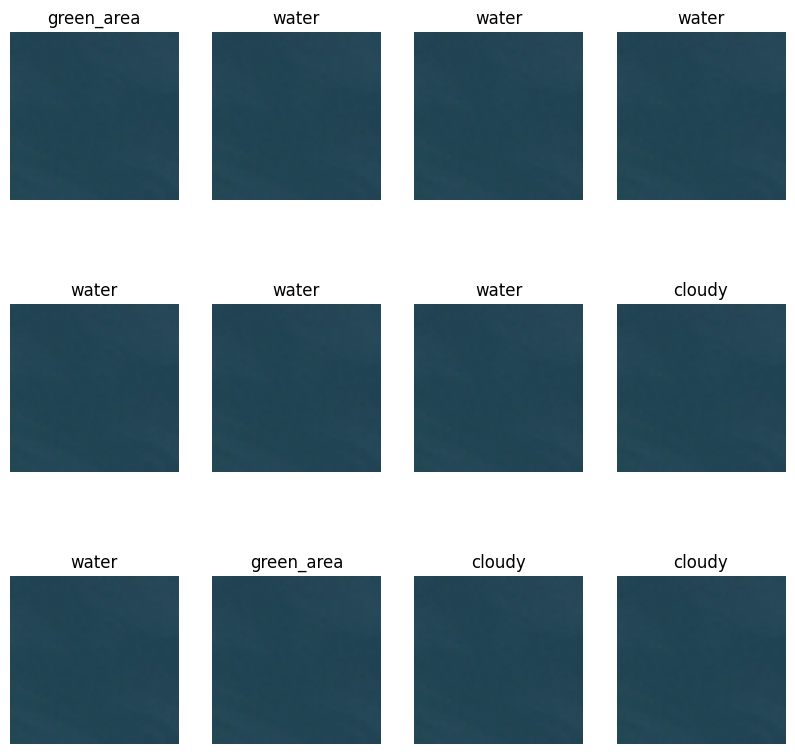

In [41]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(3):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [42]:
train_size=0.8
len(dataset)*train_size

140.8

In [43]:
train_ds=dataset.take(1766)
train_ds
len(train_ds)

176

In [44]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
len(train_ds)

176

In [45]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [46]:
len(train_ds)

140

In [47]:
len(val_ds)

17

In [48]:
len(test_ds)

19

In [49]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [52]:
resize_and_rescale=tf.keras.Sequential([
    layers.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/224)
])

In [53]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [54]:
for layer in base_model.layers:
    layer.trainable = False

In [55]:
last_layer = base_model.get_layer('conv5_block3_out')

In [56]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(20, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [57]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 126,369,684 (482.06 MB)

 Trainable params: 102,781,972 (392.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [58]:
optimizer = Adam(learning_rate=1e-6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_ds,
                    steps_per_epoch=80,
                    epochs = 50,
                    validation_data = val_ds,
                    validation_steps = 10)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 457s 6s/step - accuracy: 0.1203 - loss: 3.4391 - val_accuracy: 0.2508 - val_loss: 1.6642
Epoch 2/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:47 5s/step - accuracy: 0.2578 - loss: 2.1507

2024-04-26 11:32:01.801643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.2585 - loss: 2.1400 - val_accuracy: 0.2768 - val_loss: 1.5137
Epoch 3/50


2024-04-26 11:32:29.705567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 784s 10s/step - accuracy: 0.2806 - loss: 1.9401 - val_accuracy: 0.2163 - val_loss: 1.5304
Epoch 4/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:49 8s/step - accuracy: 0.2626 - loss: 1.9460

2024-04-26 11:54:02.462612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 11:54:42.935833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 549s 7s/step - accuracy: 0.2642 - loss: 1.9407 - val_accuracy: 0.3036 - val_loss: 1.5014
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 709s 9s/step - accuracy: 0.2931 - loss: 1.7928 - val_accuracy: 0.2906 - val_loss: 1.4979
Epoch 6/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 4:43 14s/step - accuracy: 0.2947 - loss: 1.7582

2024-04-26 12:20:35.148897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 12:22:39.595372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 968s 12s/step - accuracy: 0.2920 - loss: 1.7577 - val_accuracy: 0.2466 - val_loss: 1.5115
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3533s 44s/step - accuracy: 0.2952 - loss: 1.7395 - val_accuracy: 0.2539 - val_loss: 1.5018
Epoch 8/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:28 7s/step - accuracy: 0.2904 - loss: 1.7287

2024-04-26 13:29:00.639008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 485s 6s/step - accuracy: 0.2900 - loss: 1.7293 - val_accuracy: 0.2768 - val_loss: 1.5071
Epoch 9/50


2024-04-26 13:29:38.763685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 789s 10s/step - accuracy: 0.3428 - loss: 1.5508 - val_accuracy: 0.2665 - val_loss: 1.5173
Epoch 10/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:47 8s/step - accuracy: 0.3085 - loss: 1.6416

2024-04-26 13:51:50.047273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 13:52:37.530452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 590s 7s/step - accuracy: 0.3119 - loss: 1.6314 - val_accuracy: 0.2768 - val_loss: 1.5242
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 722s 9s/step - accuracy: 0.3293 - loss: 1.5405 - val_accuracy: 0.2125 - val_loss: 1.5334
Epoch 12/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:44 8s/step - accuracy: 0.3326 - loss: 1.5319

2024-04-26 14:12:57.078353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 14:13:37.763533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 538s 7s/step - accuracy: 0.3315 - loss: 1.5322 - val_accuracy: 0.3049 - val_loss: 1.5071
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 674s 8s/step - accuracy: 0.3685 - loss: 1.4170 - val_accuracy: 0.2759 - val_loss: 1.5319
Epoch 14/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 3:23 10s/step - accuracy: 0.3667 - loss: 1.4440

2024-04-26 14:35:02.033467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 14:35:38.865906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 647s 8s/step - accuracy: 0.3669 - loss: 1.4429 - val_accuracy: 0.2991 - val_loss: 1.5753
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 687s 9s/step - accuracy: 0.3589 - loss: 1.4162 - val_accuracy: 0.2696 - val_loss: 1.5436
Epoch 16/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:31 8s/step - accuracy: 0.3636 - loss: 1.4205

2024-04-26 14:54:44.218595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 14:55:28.040461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 503s 6s/step - accuracy: 0.3678 - loss: 1.4138 - val_accuracy: 0.2098 - val_loss: 1.6041
Epoch 17/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 720s 9s/step - accuracy: 0.4014 - loss: 1.3460 - val_accuracy: 0.2688 - val_loss: 1.5442
Epoch 18/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:41 8s/step - accuracy: 0.4191 - loss: 1.3122

2024-04-26 15:15:34.309578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 15:16:14.319185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 527s 7s/step - accuracy: 0.4191 - loss: 1.3148 - val_accuracy: 0.2422 - val_loss: 1.6263
Epoch 19/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 721s 9s/step - accuracy: 0.4195 - loss: 1.2742 - val_accuracy: 0.2688 - val_loss: 1.5912
Epoch 20/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:46 8s/step - accuracy: 0.4129 - loss: 1.2937

2024-04-26 15:36:38.026196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 15:37:24.505004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 549s 7s/step - accuracy: 0.4146 - loss: 1.2952 - val_accuracy: 0.3139 - val_loss: 1.5776
Epoch 21/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 800s 10s/step - accuracy: 0.4299 - loss: 1.2681 - val_accuracy: 0.2853 - val_loss: 1.5661
Epoch 22/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 8:20 25s/step - accuracy: 0.4455 - loss: 1.2421

2024-04-26 16:19:07.416009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1740s 19s/step - accuracy: 0.4418 - loss: 1.2466 - val_accuracy: 0.2634 - val_loss: 1.6435
Epoch 23/50


2024-04-26 16:19:44.164911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1350s 14s/step - accuracy: 0.4575 - loss: 1.2278 - val_accuracy: 0.2719 - val_loss: 1.6360
Epoch 24/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 2:44 8s/step - accuracy: 0.4189 - loss: 1.2291

2024-04-26 16:50:29.797523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 16:51:17.625376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 543s 7s/step - accuracy: 0.4193 - loss: 1.2311 - val_accuracy: 0.2556 - val_loss: 1.5956
Epoch 25/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1537s 19s/step - accuracy: 0.4348 - loss: 1.1960 - val_accuracy: 0.2320 - val_loss: 1.6085
Epoch 26/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 6:50 21s/step - accuracy: 0.4441 - loss: 1.2221

2024-04-26 17:37:15.024560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 17:39:40.312912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1366s 17s/step - accuracy: 0.4423 - loss: 1.2224 - val_accuracy: 0.2723 - val_loss: 1.6626
Epoch 27/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1875s 23s/step - accuracy: 0.4733 - loss: 1.1415 - val_accuracy: 0.2633 - val_loss: 1.6536
Epoch 28/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 3:57 12s/step - accuracy: 0.4582 - loss: 1.1611

2024-04-26 18:23:20.507975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 18:24:01.072623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 786s 9s/step - accuracy: 0.4577 - loss: 1.1635 - val_accuracy: 0.2634 - val_loss: 1.6105
Epoch 29/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 743s 9s/step - accuracy: 0.4844 - loss: 1.1573 - val_accuracy: 0.2602 - val_loss: 1.6811
Epoch 30/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 3:37 11s/step - accuracy: 0.4731 - loss: 1.1692

2024-04-26 18:47:18.517606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 18:48:32.259253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 730s 9s/step - accuracy: 0.4759 - loss: 1.1650 - val_accuracy: 0.2366 - val_loss: 1.6213
Epoch 31/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1230s 15s/step - accuracy: 0.5005 - loss: 1.1040 - val_accuracy: 0.2500 - val_loss: 1.6685
Epoch 32/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 3:32 11s/step - accuracy: 0.4818 - loss: 1.1356

2024-04-26 19:19:52.650817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 693s 9s/step - accuracy: 0.4774 - loss: 1.1382 - val_accuracy: 0.2466 - val_loss: 1.6686
Epoch 33/50


2024-04-26 19:20:37.186914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1153s 14s/step - accuracy: 0.4966 - loss: 1.1109 - val_accuracy: 0.2844 - val_loss: 1.7061
Epoch 34/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 6:35 20s/step - accuracy: 0.4874 - loss: 1.1120

2024-04-26 20:00:11.341208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 20:00:46.026816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1256s 15s/step - accuracy: 0.4904 - loss: 1.1079 - val_accuracy: 0.2646 - val_loss: 1.6714
Epoch 35/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1888s 23s/step - accuracy: 0.5292 - loss: 1.0679 - val_accuracy: 0.2320 - val_loss: 1.6682
Epoch 36/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 5:47 17s/step - accuracy: 0.5222 - loss: 1.0708

2024-04-26 20:49:52.837066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 20:51:49.539404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 1175s 14s/step - accuracy: 0.5196 - loss: 1.0744 - val_accuracy: 0.2455 - val_loss: 1.7814
Epoch 37/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 610s 8s/step - accuracy: 0.5352 - loss: 1.0523 - val_accuracy: 0.2445 - val_loss: 1.7797
Epoch 38/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:45 5s/step - accuracy: 0.5049 - loss: 1.0883

2024-04-26 21:07:17.824223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.5070 - loss: 1.0875 - val_accuracy: 0.2455 - val_loss: 1.6696
Epoch 39/50


2024-04-26 21:07:44.310276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 470s 6s/step - accuracy: 0.5260 - loss: 1.0687 - val_accuracy: 0.2539 - val_loss: 1.7628
Epoch 40/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:36 5s/step - accuracy: 0.5317 - loss: 1.0460

2024-04-26 21:20:24.194535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 21:20:48.148911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 314s 4s/step - accuracy: 0.5337 - loss: 1.0427 - val_accuracy: 0.2589 - val_loss: 1.7237
Epoch 41/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 410s 5s/step - accuracy: 0.5495 - loss: 1.0360 - val_accuracy: 0.2469 - val_loss: 1.8425
Epoch 42/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.5289 - loss: 1.0463

2024-04-26 21:32:35.133749: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 21:32:59.886355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.5313 - loss: 1.0436 - val_accuracy: 0.2825 - val_loss: 1.6397
Epoch 43/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 422s 5s/step - accuracy: 0.5410 - loss: 1.0291 - val_accuracy: 0.2445 - val_loss: 1.8869
Epoch 44/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:42 5s/step - accuracy: 0.5234 - loss: 1.0463

2024-04-26 21:45:09.181831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.5296 - loss: 1.0383 - val_accuracy: 0.2500 - val_loss: 1.6352
Epoch 45/50


2024-04-26 21:45:33.990868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 445s 6s/step - accuracy: 0.5671 - loss: 0.9969 - val_accuracy: 0.2500 - val_loss: 1.7627
Epoch 46/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.5569 - loss: 0.9977

2024-04-26 21:57:55.110183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 21:58:18.983699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.5544 - loss: 1.0005 - val_accuracy: 0.2601 - val_loss: 1.8569
Epoch 47/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 469s 6s/step - accuracy: 0.5545 - loss: 1.0038 - val_accuracy: 0.2539 - val_loss: 1.8393
Epoch 48/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.5642 - loss: 0.9674

2024-04-26 22:11:17.554013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 22:11:41.410285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.5654 - loss: 0.9674 - val_accuracy: 0.2634 - val_loss: 1.7747
Epoch 49/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.6021 - loss: 0.9448 - val_accuracy: 0.2445 - val_loss: 1.8303
Epoch 50/50
60/80 ━━━━━━━━━━━━━━━━━━━━ 1:41 5s/step - accuracy: 0.5481 - loss: 0.9993

2024-04-26 22:24:03.917285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-26 22:24:32.396679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.5462 - loss: 1.0006 - val_accuracy: 0.2679 - val_loss: 1.8367


In [74]:
score= model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.2308 - loss: 1.8925


In [75]:
score

[1.8733614683151245, 0.22203947603702545]

In [76]:
history

In [77]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 80}

In [78]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [79]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

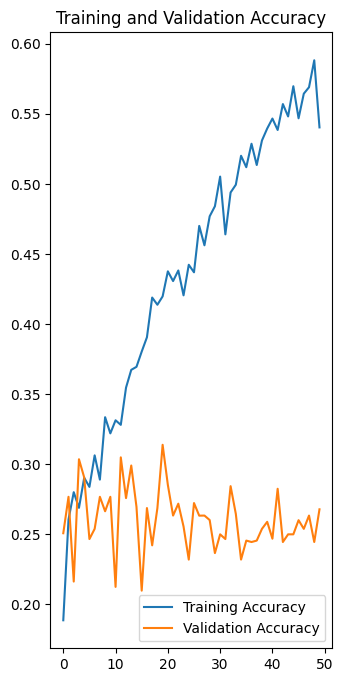

In [80]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

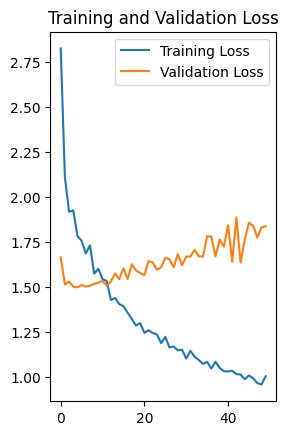

In [81]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [82]:
for image_batch,labels_batch in test_ds.take(1):
    
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


2024-04-26 22:29:50.589829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-26 22:29:54.507453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


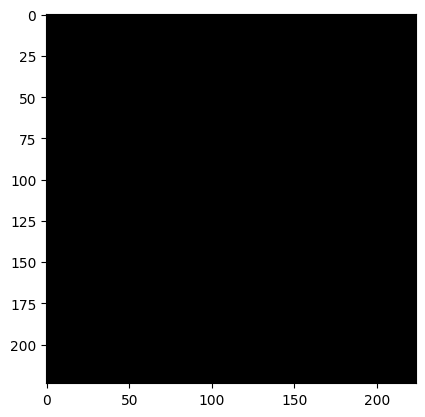

In [83]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: cloudy
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[3.8050818e-01 2.0381309e-01 2.9964802e-01 9.7622566e-02 1.5784204e-03
 3.3254933e-04 2.3854312e-03 1.1838779e-03 8.3967135e-04 4.9153186e-04
 1.1462136e-03 1.4291132e-03 8.8086934e-04 1.2842494e-03 8.6235761e-04
 5.1579560e-04 1.6077983e-03 1.1198479e-03 1.0293064e-03 1.7211497e-03]
predicted label: cloudy


2024-04-26 22:30:04.879064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


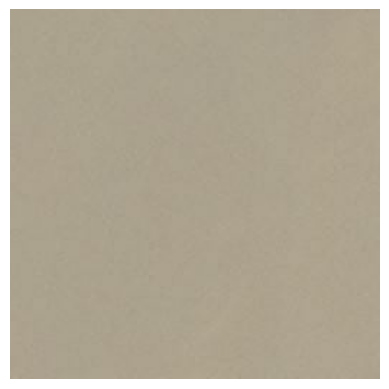

In [84]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [85]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


2024-04-26 22:30:15.695506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


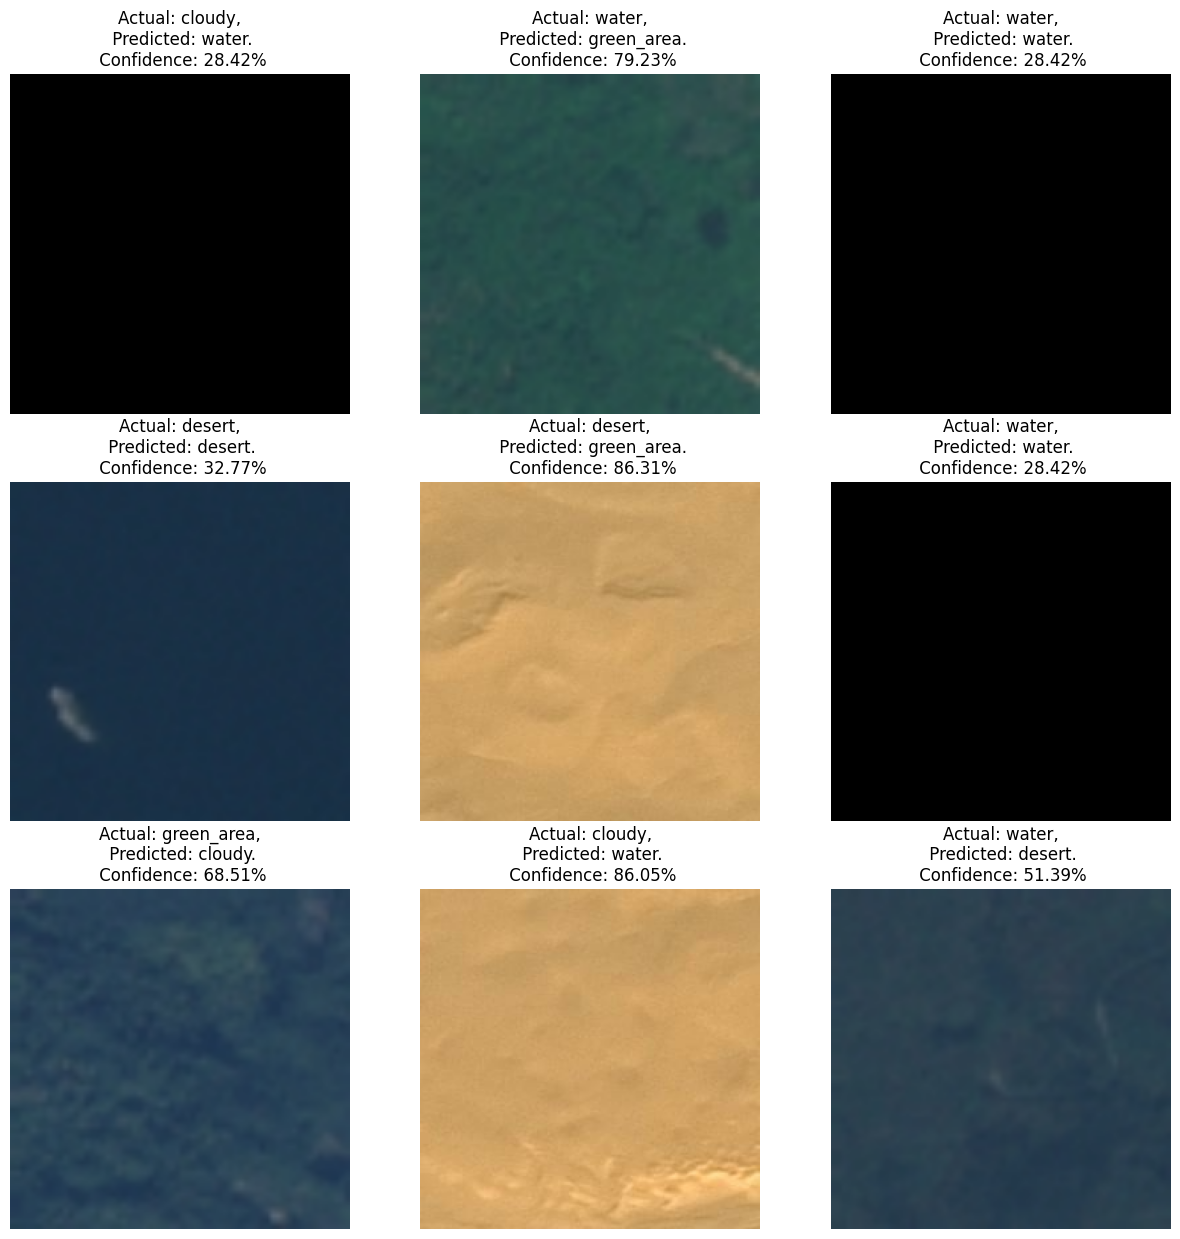

In [86]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [88]:
model_version = 1
model_dir = "./model1"
for filename in os.listdir(model_dir):
    try:
        version = int(filename)
        model_version = max(model_version, version)
    except ValueError:
        pass
model_version += 1

# Save the trained model (choose either .h5 or .keras extension)
model.save(f"{model_dir}/{model_version}.h5")  # Use .h5 for HDF5 format
# or
# model.save(f"{model_dir}/{model_version}.keras")  # Use .keras for native Keras format

print(f"Model saved to: {model_dir}/{model_version}.h5")  # Adjust based on saved extension

Model saved to: ./model1/2.h5
